# Project 3 : Customer Churn Prediction



## Overview
The Project is to provide business insigts to the business stakeholder about if the customers would churn and stop the business connection with the company 

The project has utilized public data to analyze customer churn in the SyriaTel telecommunications company. Based upon the findings about Customer Churn and the factors leading to the action, recommendatios are given to the stakerholders


## Business Understanding

A telecommunications company provides telephone service to customers.  They would like to investigate further insights about customer churn and the factors leading to the actions.

We work on this project to provide insights to this telecommunications company

Business insights to investigate:
1. Predict if a customer will soon churn and stop the service
2. What factors or any predictable patterns are affecting the customer churn actions ? 

## Data Understanding

Source of the data is from the company through the public Kaggle competition . The Dataset contains the labels for whether a customer has churned or not. Other aspects and features of the customers are also provided, such as day time minutes, night time minutes, void mail plans, and customer service calls etc.  

## Data Preparation
### Loading the Data

We load in the dataset. We use some data as the training data for our model, and some other data as the testing data to check model performance

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

pd.set_option('max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [304]:
df = pd.read_csv('data\\bigml_59c28831336c6604c800002a.csv')

In [305]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Display and Explore  the Dataset Information

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Dataset size 3333 observations

In [307]:
df.shape

(3333, 21)

In [308]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Check Missing Data 

In [309]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### Check Data Distribution
#### User Chur Distribution

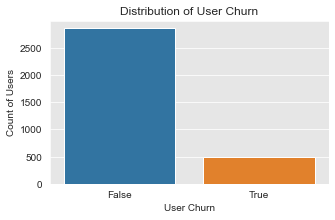

In [310]:
fig, ax = plt.subplots(figsize=(5, 3))

sns.countplot(df['churn'])

ax.set_xlabel("User Churn")
ax.set_ylabel("Count of Users")
ax.set_title("Distribution of User Churn");

#### Total Day Minutes distribution

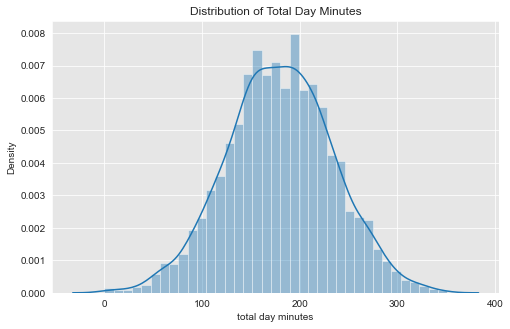

In [311]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.distplot(df['total day minutes'])
ax.set_title("Distribution of Total Day Minutes");

#### International Plan Distribution

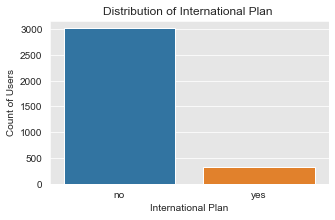

In [312]:
fig, ax = plt.subplots(figsize=(5, 3))

sns.countplot(df['international plan'])

ax.set_xlabel("International Plan")
ax.set_ylabel("Count of Users")
ax.set_title("Distribution of International Plan ");

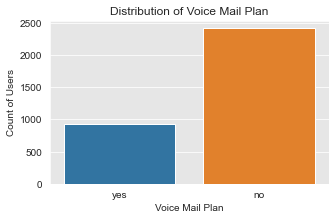

In [313]:
fig, ax = plt.subplots(figsize=(5, 3))

sns.countplot(df['voice mail plan'])

ax.set_xlabel("Voice Mail Plan")
ax.set_ylabel("Count of Users")
ax.set_title("Distribution of Voice Mail Plan");

### Relevant Features

Our Team has identified the relevant features for customer churn prediction

In [314]:
features = df.columns
features

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [315]:
columns_drop = ['state','area code','phone number']

In [316]:
df.drop(columns=columns_drop, inplace=True)
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Correlation Heatmap

Text(0.5, 1.0, 'Heatmap of Correlation Between Variables')

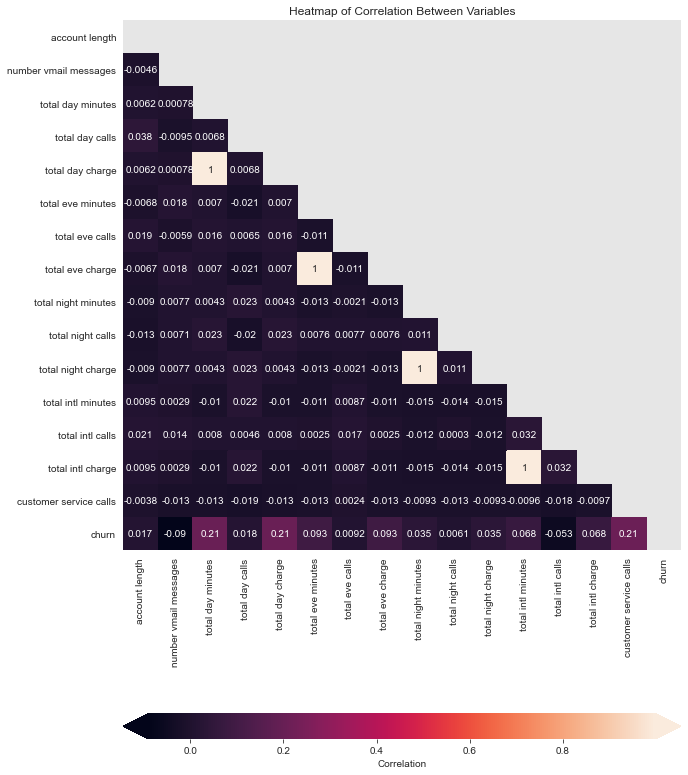

In [317]:
# compute the correlation matrix
heatmap_data = df 
corr = heatmap_data.corr()

fig, ax = plt.subplots(figsize=(10, 15))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    data=corr,
    # The mask means we only show half the values,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

ax.set_title("Heatmap of Correlation Between Variables")

### Training Data and Testing Data

In [318]:
Y=df['churn']
X=df.drop(['churn'], axis=1)

### Dataset Train Test Split

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=40)

In [320]:
X_train.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
517,52,no,no,0,214.7,68,36.50,158.6,138,13.48,123.4,114,5.55,9.4,4,2.54,2
2436,63,no,no,0,207.6,96,35.29,229.0,112,19.47,162.6,131,7.32,13.3,2,3.59,1
2057,9,no,yes,16,88.5,87,15.05,178.8,108,15.20,228.7,96,10.29,11.5,3,3.11,2
2844,161,no,no,0,173.4,100,29.48,213.7,74,18.16,141.5,69,6.37,11.5,4,3.11,1
1999,160,no,no,0,82.7,116,14.06,194.6,95,16.54,159.0,54,7.15,10.9,9,2.94,0


### Data Preprocessing

#### Categorical Variables Encoding

#### Encode 'Internaltional Plan' Variable

In [322]:
BLE_plan= LabelEncoder()

In [323]:
international_plan_encoded = LE_plan.fit_transform(X_train['international plan'])

In [324]:
X_train['international_plan_encoded'] = international_plan_encoded

In [325]:
international_plan_encoded = LE_plan.transform(X_test['international plan'])

In [326]:
X_test['international_plan_encoded'] = international_plan_encoded

#### Encode 'voice mail plan' Variable

In [327]:
LE_voicemail = LabelEncoder()
X_train['voice_mail_plan_encoded'] = LE_voicemail.fit_transform(X_train['voice mail plan'])
X_test['voice_mail_plan_encoded'] = LE_voicemail.transform(X_test['voice mail plan'])

In [328]:
X_train.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international_plan_encoded,voice_mail_plan_encoded
517,52,no,no,0,214.7,68,36.50,158.6,138,13.48,123.4,114,5.55,9.4,4,2.54,2,0,0
2436,63,no,no,0,207.6,96,35.29,229.0,112,19.47,162.6,131,7.32,13.3,2,3.59,1,0,0
2057,9,no,yes,16,88.5,87,15.05,178.8,108,15.20,228.7,96,10.29,11.5,3,3.11,2,0,1
2844,161,no,no,0,173.4,100,29.48,213.7,74,18.16,141.5,69,6.37,11.5,4,3.11,1,0,0
1999,160,no,no,0,82.7,116,14.06,194.6,95,16.54,159.0,54,7.15,10.9,9,2.94,0,0,0


#### Encode Classification Labels

In [329]:
LE_label = LabelEncoder()
y_train = LE_label.fit_transform(y_train)
y_test = LE_label.transform(y_test)

In [330]:
y_train

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [331]:
columns_drop = ['international plan', 'voice mail plan']
X_train.drop(columns= columns_drop, inplace=True)
X_test.drop(columns= columns_drop, inplace=True)

In [332]:
X_train.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international_plan_encoded,voice_mail_plan_encoded
517,52,0,214.7,68,36.50,158.6,138,13.48,123.4,114,5.55,9.4,4,2.54,2,0,0
2436,63,0,207.6,96,35.29,229.0,112,19.47,162.6,131,7.32,13.3,2,3.59,1,0,0
2057,9,16,88.5,87,15.05,178.8,108,15.20,228.7,96,10.29,11.5,3,3.11,2,0,1
2844,161,0,173.4,100,29.48,213.7,74,18.16,141.5,69,6.37,11.5,4,3.11,1,0,0
1999,160,0,82.7,116,14.06,194.6,95,16.54,159.0,54,7.15,10.9,9,2.94,0,0,0


In [333]:
X_train.shape

(2499, 17)

### Feature Scaling 

In [334]:
scaler= StandardScaler()

In [335]:
X_train_scaled = scaler.fit_transform(X_train)

In [336]:
X_train_scaled

array([[-1.24587705, -0.58628004,  0.63555102, ...,  0.33362456,
        -0.32969024, -0.61141784],
       [-0.96633191, -0.58628004,  0.50513539, ..., -0.42916389,
        -0.32969024, -0.61141784],
       [-2.33864444,  0.58499113, -1.68254095, ...,  0.33362456,
        -0.32969024,  1.63554272],
       ...,
       [-0.07687008, -0.58628004,  0.68147202, ..., -1.19195235,
        -0.32969024, -0.61141784],
       [-0.4834812 , -0.58628004,  0.32328824, ..., -0.42916389,
        -0.32969024, -0.61141784],
       [-1.83038054, -0.58628004,  2.44483834, ...,  0.33362456,
        -0.32969024, -0.61141784]])

In [337]:
X_test_scaled = scaler.transform(X_test)

In [338]:
feature_names=X_train.columns

## Modeling
### Building a Baseline Model

Now, we'll build a logistic regression model to serve as our baseline classifier model:

In [339]:
baseline_model = LogisticRegression(class_weight = 'balanced', random_state=42)

Then we evaluate the model using `cross_validate`, we perform 5 separate train-test splits within our `X_train` and `y_train'

In [340]:
baseline_score = cross_val_score(baseline_model, X_train_scaled, y_train, cv=5)

baseline_score = (baseline_score.mean())
print('Base Model Training Score ', baseline_score)

Base Model Training Score  0.7691054108216433


In [341]:
baseline_model.fit(X_train_scaled, y_train)
score= accuracy_score(y_test, baseline_model.predict(X_test_scaled))
print('Base Model Test Score ', score)

Base Model Test Score  0.7709832134292566


The cross valdiation score accuracy for the baseline model is about 0.77.  The baseline model would focus on the linear relations among the features. We would also look at a non-linear emsemble model to extract the non-linear relationships

### Build a Model of Random Forest
     Build and Evaluate second Model , with the trasfromed featrues

In [342]:
second_model_forest = RandomForestClassifier(class_weight='balanced', random_state=21)

In [343]:
second_model_forest_score = cross_val_score(second_model_forest, X_train_scaled, y_train, cv=5)

second_model_forest_score = (second_model_forest_score.mean())
print('Random Forest Model Training Score ', second_model_forest_score)

Random Forest Model Training Score  0.9379791583166333


In [344]:
second_model_forest.fit(X_train_scaled, y_train)
score= accuracy_score(y_test, second_model_forest.predict(X_test_scaled))
print('Random Forest Model Test Score ', score)

Random Forest Model Test Score  0.947242206235012


In [345]:
print("Current second Model Score")
print(second_model_forest_score)
print()
print("Baseline Model Score")
print(baseline_score)

Current second Model Score
0.9379791583166333

Baseline Model Score
0.7691054108216433



#### Our second model of random forst has better score than the baseline model.  It seems that the second model helps capture the linear and nonlinear relationships among features and the labels 


### Tune the Parameters of Random Forest Model 



We fine tune the hyperparameters in random forst to check if there is improvement. 

In [346]:
param_grid={
    'n_estimators': [55,65,80,100],
    'max_depth':[8,10,14,18],
    'min_samples_split':[2,8,10], 
    'min_samples_leaf': [1,3,6],
    'criterion': ['gini', 'entropy']
}

rf=RandomForestClassifier(class_weight='balanced',random_state=22)
rf_grid=GridSearchCV(rf,param_grid,cv=5)
rf_grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=22),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 10, 14, 18],
                         'min_samples_leaf': [1, 3, 6],
                         'min_samples_split': [2, 8, 10],
                         'n_estimators': [55, 65, 80, 100]})

In [347]:
rf_grid

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=22),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 10, 14, 18],
                         'min_samples_leaf': [1, 3, 6],
                         'min_samples_split': [2, 8, 10],
                         'n_estimators': [55, 65, 80, 100]})

Training Accuracy

In [348]:
print( "Training Accuracy: {}".format(rf_grid.best_score_) )

Training Accuracy: 0.951186372745491


In [349]:
print('Testing Accuracy')
final_model.score(X_test_scaled, y_test)

Testing Accuracy


0.9544364508393285

#### Best Combination of the parameters

In [350]:
rf_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 55}

In [351]:
# rf_grid.cv_results_

### Build  a Final Predictive Classifier  Model



#### Select the best combination of hyperparameters to build final model

In [352]:
best_RF_model = rf_grid.best_estimator_
final_model = best_RF_model

## Model Prediction

We make model prediction on the test set

In [353]:
predictions=final_model.predict(X_test_scaled)

In [354]:
d={'User Churn':y_test, 'Prediction':predictions}
data_frame=pd.DataFrame(data=d)

In [355]:
data_frame

,User Churn,Prediction
0,0,0
1,0,0
2,1,0
3,0,0
4,1,1
...,...,...
829,0,0
830,0,0
831,0,0
832,1,1


## Model Evaluation and Interpretation
we evaluate model performance on the test set
### Evaluation Metrics Accuracy, Precision/Recall/F1 Score

Model Accuracy 

In [356]:
final_model.score(X_test_scaled, y_test)

0.9580335731414868

Precision/Recall/F1 Score

In [357]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       725
           1       0.89      0.77      0.83       109

    accuracy                           0.96       834
   macro avg       0.93      0.88      0.90       834
weighted avg       0.96      0.96      0.96       834



### Metrics ROC AUC

We would use another metric to evaluate model performance. 
We check area under the ROC curve

In [358]:
# Calculate the probability scores of each point in the training set
y_train_score = final_model.predict_proba(X_train_scaled)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score[:,1])

# Calculate the probability scores of each point in the test set
y_test_score = final_model.predict_proba(X_test_scaled)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score[:,1])

In [359]:
print('Area Under Curve')
print('AUC: {}'.format(auc(test_fpr, test_tpr)))

Area Under Curve
AUC: 0.9131920278392915


#### Visualization of the ROC Curve

AUC: 0.9131920278392915


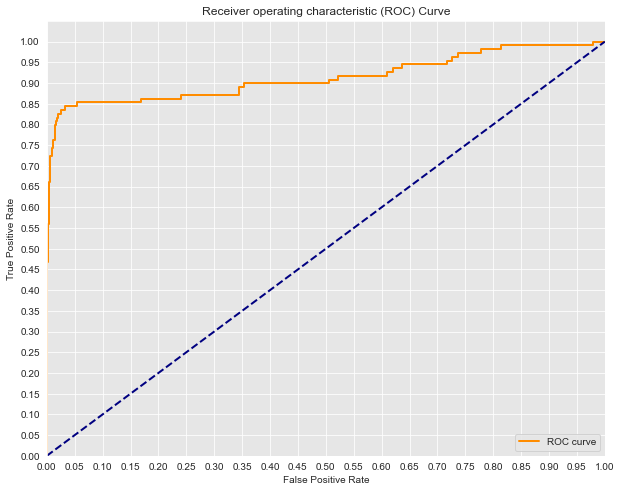

In [360]:

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(test_fpr, test_tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Overall Model Performance

The model accuracy is showing good model performance. 
Other metrics such as precision/recall and ROC AUC show good model performance 

### Interpret the Final Model

Below, we would look at the features leading to the classification labels.  Each feature presents a different weight factor

###  Feature Importance

Calculate the Feature weights leading to the classification label

In [361]:
importance=final_model.feature_importances_
index=np.argsort(importance)[::-1]

print('Feature importance ranking:')

for i in range(len(feature_names)):
    print("%d. feature %d %s: %f" % (i+1, index[i],feature_names[index[i]],importance[[index[i]]]))

Feature importance ranking:
1. feature 4 total day charge: 0.138900
2. feature 2 total day minutes: 0.137229
3. feature 14 customer service calls: 0.122407
4. feature 15 international_plan_encoded: 0.090362
5. feature 5 total eve minutes: 0.068345
6. feature 7 total eve charge: 0.063638
7. feature 13 total intl charge: 0.049776
8. feature 12 total intl calls: 0.041917
9. feature 11 total intl minutes: 0.041324
10. feature 8 total night minutes: 0.040891
11. feature 9 total night calls: 0.037082
12. feature 10 total night charge: 0.035503
13. feature 0 account length: 0.031263
14. feature 3 total day calls: 0.031188
15. feature 6 total eve calls: 0.028174
16. feature 1 number vmail messages: 0.026016
17. feature 16 voice_mail_plan_encoded: 0.015985


#### Visualization of Feature Importance

Text(0, 0.5, 'Features')

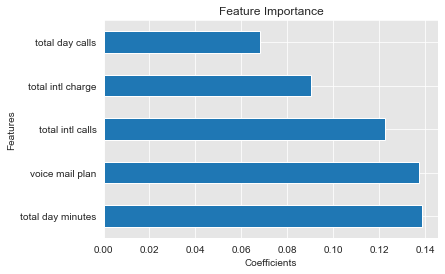

In [362]:
fig, ax = plt.subplots()

(pd.Series(final_model.feature_importances_, index=X.columns)
   .nlargest(5)
   .plot(kind='barh'))        

ax.set_title("Feature Importance");
ax.set_xlabel('Coefficients')
ax.set_ylabel('Features')

From the analysis above, the top 3 most important features related to user churn are as follows:

Total Day Minutes

Total Day Charge

Customer Service Calls


### Recommendations

The Business Stakeholders, the telecommuncations company,  can use our predictive model to predict and forecast the customers will high probability of churning. and They can take actions accordingly.  Our model has also identified the important features related to the customer action of churning or staying. The telecommunication company can also focus on these features to improve their customer service 

#### Limitations

The Dataset size in this project is not very large. Therefore, We still need to  further investigate the generality of the model performance

### Next Steps for Modeling

 1. Feature Engineering 
 2. More data needed to improve model performance